Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [2]:
import glob
import os
import pandas as pd

# Get the list of CSV-files
PATH = os.getcwd() + "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634    
# Will hold the dataframe containing all CSV-data
df_concatenated = []

# Read all CSVs into individual dataframes and concatenate
all_files.sort() # read data of subjects in order
for filename in all_files:
    data_frame = pd.read_csv(filename, header=0) # infer column-names from first row 
    df_concatenated.append(data_frame) # add dataframe to list 
df_concatenated = pd.concat(df_concatenated, axis=0, ignore_index=True) # concat list to one big dataframe

# Display in a nice way 
# use pd.set_option here to display in a nice way
pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',6)
pd.set_option('display.width',1000)
print(df_concatenated)

# Save concatenated dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated.csv'
df_concatenated.to_csv(path_or_buf=DATAPATH)

      SubjectID  StimulusType  response    RT
0          9001             1         1   369
1          9001             1         1   532
2          9001             1         1   154
3          9001             0         1   151
4          9001             1         1   418
5          9001             1         1   185
6          9001             1         1   451
7          9001             1         1   402
8          9001             1         1   202
9          9001             1         1   353
10         9001             1         1   381
11         9001             0         1   236
12         9001             1         1   251
13         9001             1         1   204
14         9001             0         1   150
15         9001             1         1   613
16         9001             1         1   671
17         9001             1         1   219
18         9001             0         1   215
19         9001             1         1   985
20         9001             1     

### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [3]:
# Add 'congruence' column and set value to true if StimulusType and Response match, else set to false
df_concatenated['congruence'] = df_concatenated['StimulusType'] == df_concatenated['response']

# Create the dataframe with averaged data
df_concatenated_avg = df_concatenated[['SubjectID','StimulusType','RT','congruence']] # create a new dataframe with corresponding headers to fill with averaged data
df_concatenated_avg['RT'].replace(0, np.NaN, inplace=True) # Transform 0ms RT to NaN to prevent taking these into account for mean 
df_concatenated_avg = df_concatenated_avg.groupby(['SubjectID','StimulusType']).mean() # Calculate mean of RT and congruence for all SubjectID-StimulusType combinations 

# Cosmetics 
df_concatenated_avg.columns = ['RT','accuracy'] # Rename 'congruence' to 'accuracy'
df_concatenated_avg['RT'].replace(np.NaN, 0, inplace=True) # Replace NaNs with 0 in the final data again

# Print and save averaged dataframe
pd.set_option('display.max_rows',30)
print(df_concatenated_avg)
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH)

                                RT  accuracy
SubjectID StimulusType                      
9001      0             193.000000    0.6000
          1             391.878788    0.4125
9002      0             354.000000    0.9500
          1             362.875000    1.0000
9003      0             288.000000    0.9500
          1             402.320513    0.9750
9004      0             238.000000    0.9500
          1             305.037500    1.0000
9005      0               0.000000    1.0000
          1             369.493671    0.9875
9006      0             342.000000    0.9500
          1             427.437500    1.0000
9007      0             234.000000    0.9500
          1             307.937500    1.0000
9008      0              50.000000    0.9500
          1             328.187500    1.0000
9009      0               0.000000    1.0000
          1             439.700000    1.0000
9010      0             271.000000    0.8000
          1             313.775000    1.0000
9011      

C:\Users\User\Anaconda3\envs\acc\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

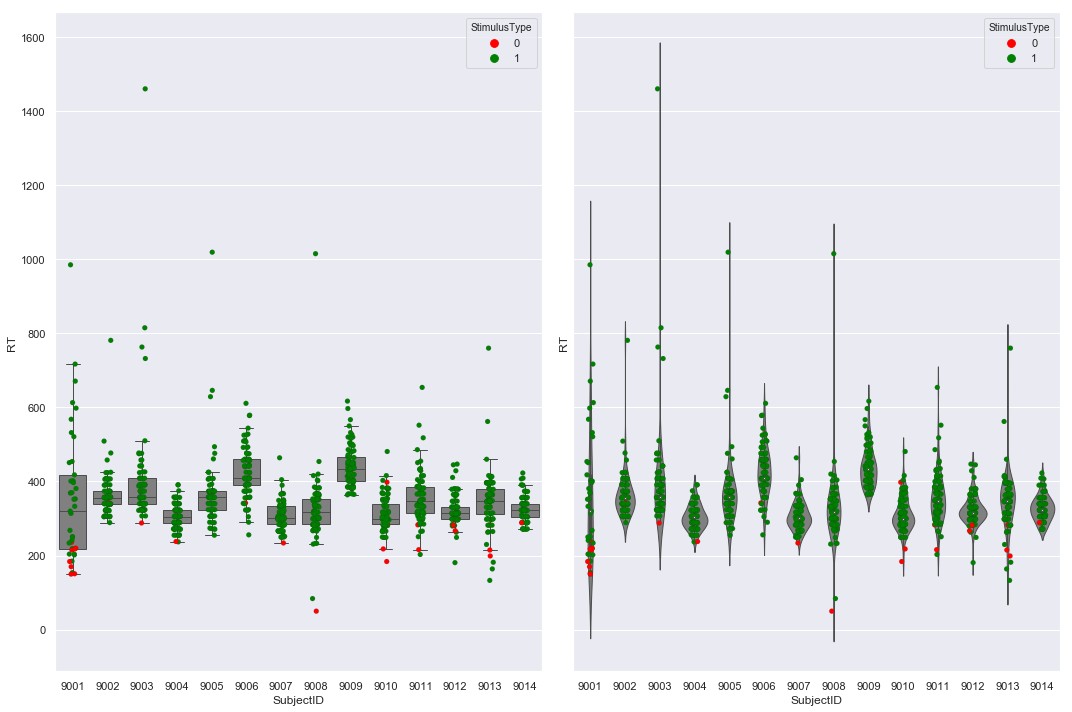

In [4]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")

# mask RT=0 using NaNs
data_concat['RT'] = data_concat['RT'].mask(data_concat['RT'] == 0)
#print(data_concat)

# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10), sharey="row")

# first subplot with stripplot and boxplot
sns.stripplot(data=data_concat,x='SubjectID', hue='StimulusType', y='RT', palette = ['red','green'], size=5, linewidth = 0.1, ax = axes[0])
sns.boxplot(data=data_concat,x='SubjectID',y='RT', color = 'grey', showfliers=False, linewidth = 1, ax = axes[0]) # prevent outliers to be drawn again 

# second subplot with stripplot and violinplot
sns.stripplot(data=data_concat,x='SubjectID', hue='StimulusType', y='RT', palette = ['red','green'], size=5, linewidth = 0.1, ax = axes[1])
sns.violinplot(data=data_concat,x='SubjectID',y='RT', color = 'grey', linewidth = 1, ax = axes[1]) # prevent outliers to be drawn again 

# handling legends
fig.tight_layout()

#TODO don't display duplicated legends


### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

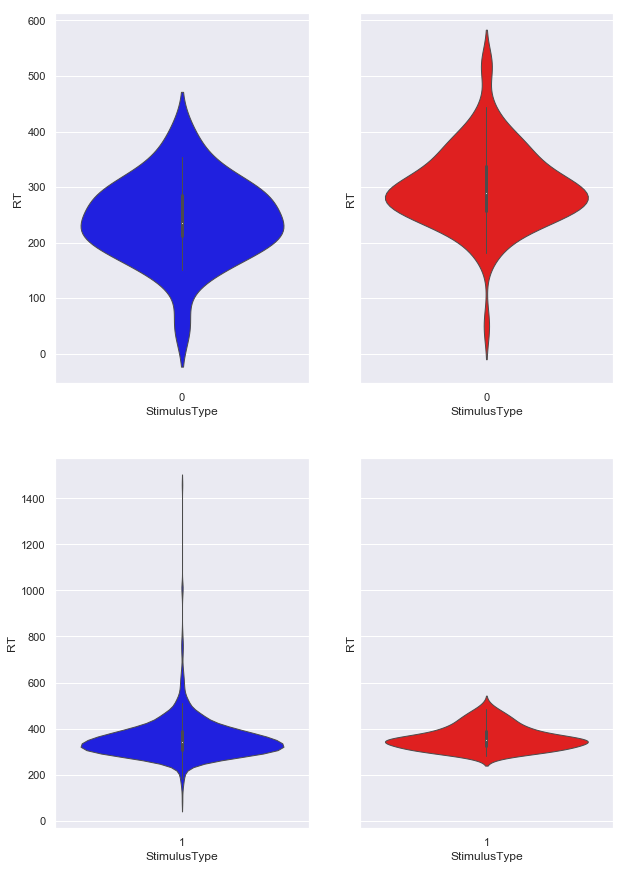

In [7]:
 # again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID

import ntpath
import re
import glob 
import os
import pandas as pd 
import numpy as np 
# set the /DataComplete as root directory so 'groups' contains the group folders
rootdir = os.getcwd() + ("/Experimental_Data/") 

#create list to store all files
all_files = []

#go through all groups and introduce proper naming convention, e.g. Sub1001 etc.
all_files = glob.glob(os.path.join(rootdir, "*.csv"))
all_filenames = [] 
for file in all_files:
    file_polished = int(re.search(r'\d+', ntpath.basename(file)).group())
    all_filenames.append(file_polished)
#print(all_filenames)
    
#create list to hold the dataframe
df_concatenated_complete = []
all_files.sort()

#read all CSV files into a dataframe and concatenate them into the list
for index, filename in enumerate(all_files):
    data_frame = pd.read_csv(filename, header = 0)
    data_frame['SubjectID'] = all_filenames[index] 
    df_concatenated_complete.append(data_frame)
df_concatenated_complete = pd.concat(df_concatenated_complete, axis=0, ignore_index=True)
   

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',6)
pd.set_option('display.width',1000)
#print(df_concatenated_complete)

# Add 'congruence' column 
df_concatenated_complete['congruence'] = df_concatenated_complete['StimulusType'] == df_concatenated_complete['response']

# Create the dataframe with averaged data
df_concatenated_complete_avg = df_concatenated_complete[['SubjectID','StimulusType','RT','congruence']] # create a new dataframe with averaged data
df_concatenated_complete_avg['RT'].replace(0, np.NaN, inplace=True) # Transform 0ms RT to NaN to prevent taking these into account for mean 
df_concatenated_complete_avg = df_concatenated_complete_avg.groupby(['SubjectID','StimulusType']).mean() # Calculate mean of RT and congruence for all SubjectID-StimulusType combinations 
df_concatenated_complete_avg.columns = ['RT','accuracy'] # Rename 'congruence' to 'accuracy'
df_concatenated_complete_avg['RT'].replace(np.NaN, 0, inplace=True) # Replace NaNs with 0 in the final data again

#save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concat_allsubjects_avg.csv'
df_concatenated_complete_avg.to_csv(DATAPATH)

# read data
data_all_concat = pd.read_csv(os.getcwd() + "/Processed/data_concat_allsubjects_avg.csv")

# mask RT=0 using NaNs
data_all_concat['RT'] = data_all_concat['RT'].mask(data_all_concat['RT'] == 0)

go = data_all_concat.query("StimulusType=='1'")
no = data_all_concat.query("StimulusType=='0'")

go_single =data_concat.query("StimulusType=='1'")
no_single =data_concat.query("StimulusType=='0'")

# Now it's time to plot your results
figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,15),sharey="row")

# violin plot for your group's data
sns.violinplot(data=no_single,x='StimulusType',y='RT', color = 'blue', linewidth = 1, ax=axes[0,0]) # prevent outliers to be drawn again 
sns.violinplot(data=go_single,x='StimulusType',y='RT', color = 'blue', linewidth = 1, ax=axes[1,0])

# violin plot of all group's data
sns.violinplot(data=no,x='StimulusType',y='RT', color = 'red', linewidth = 1, ax= axes[0,1]) # prevent outliers to be drawn again
sns.violinplot(data=go,x='StimulusType',y='RT', color = 'red', linewidth = 1, ax= axes[1,1])
                                                                                    

fig.tight_layout()

# Explain CLT
# See below 


Compare two datasets and relate it with CLT. Write your opinion here.


The central limit theorem states that with an increasing N the distribution tends further towards a normal distribution. We can see, especially when comparing the Go-Trials (1), that outliers are less important in the plot. Also in the first row, so comparing the No-Go Trials we can see, that for a higher N, on the right side the distribution is more even and closer to a normal distribution. When only looking at our data there is a little shift towards lower values in response time.

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

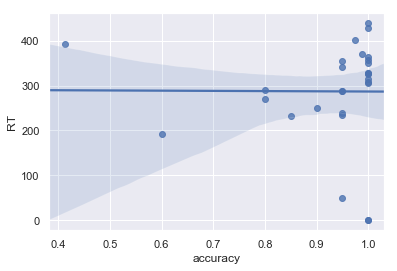

In [6]:
ax = sns.regplot(data=df_concatenated_avg,x='accuracy',y='RT')


We expected a corelation between the Response Time and the Accuracy. 
We expected that the accuracy would decrease with the increase in speed of responding and vise versa.
In fact the plot shows, that a high accuracy agrees with a higher RT, and some faster responsetimes seems to evoke less accuracy.
